In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import statsmodels.formula.api as smf
from scipy.stats import f_oneway

In [2]:
# Read taxis dataset

taxis = pd.read_csv('taxis.csv')  # replace with your file
taxis.head()

pickup              dropoff  passengers  distance  fare   tip  \
0  2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0  2.15   
1  2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0  0.00   
2  2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5  2.36   
3  2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0  6.15   
4  2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

### Missing Values

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


<Axes: >

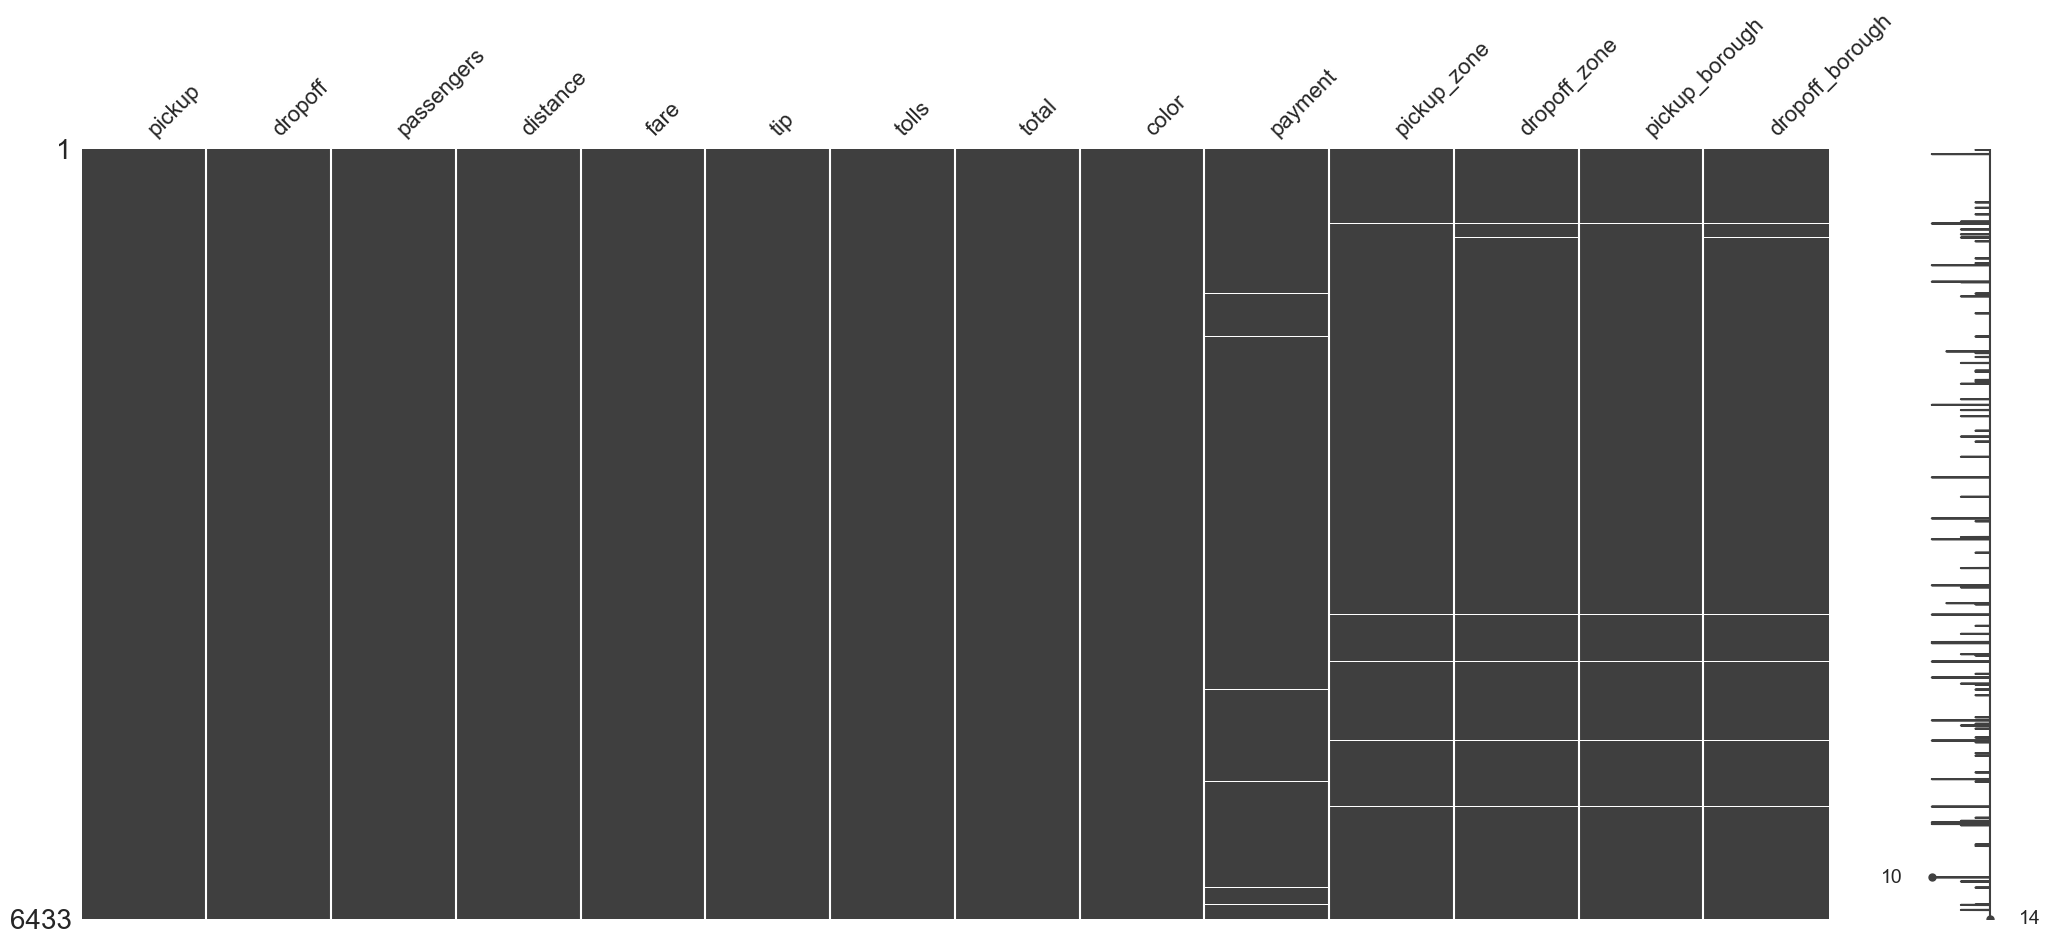

In [3]:
# Missing values

print(taxis.isna().sum())
msno.matrix(taxis)

In [4]:
# They are very few in relation to the total size of the database.
# It is safe to assume that dropping them all, will not change the dataset. 

taxis = taxis.dropna()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64


<Axes: >

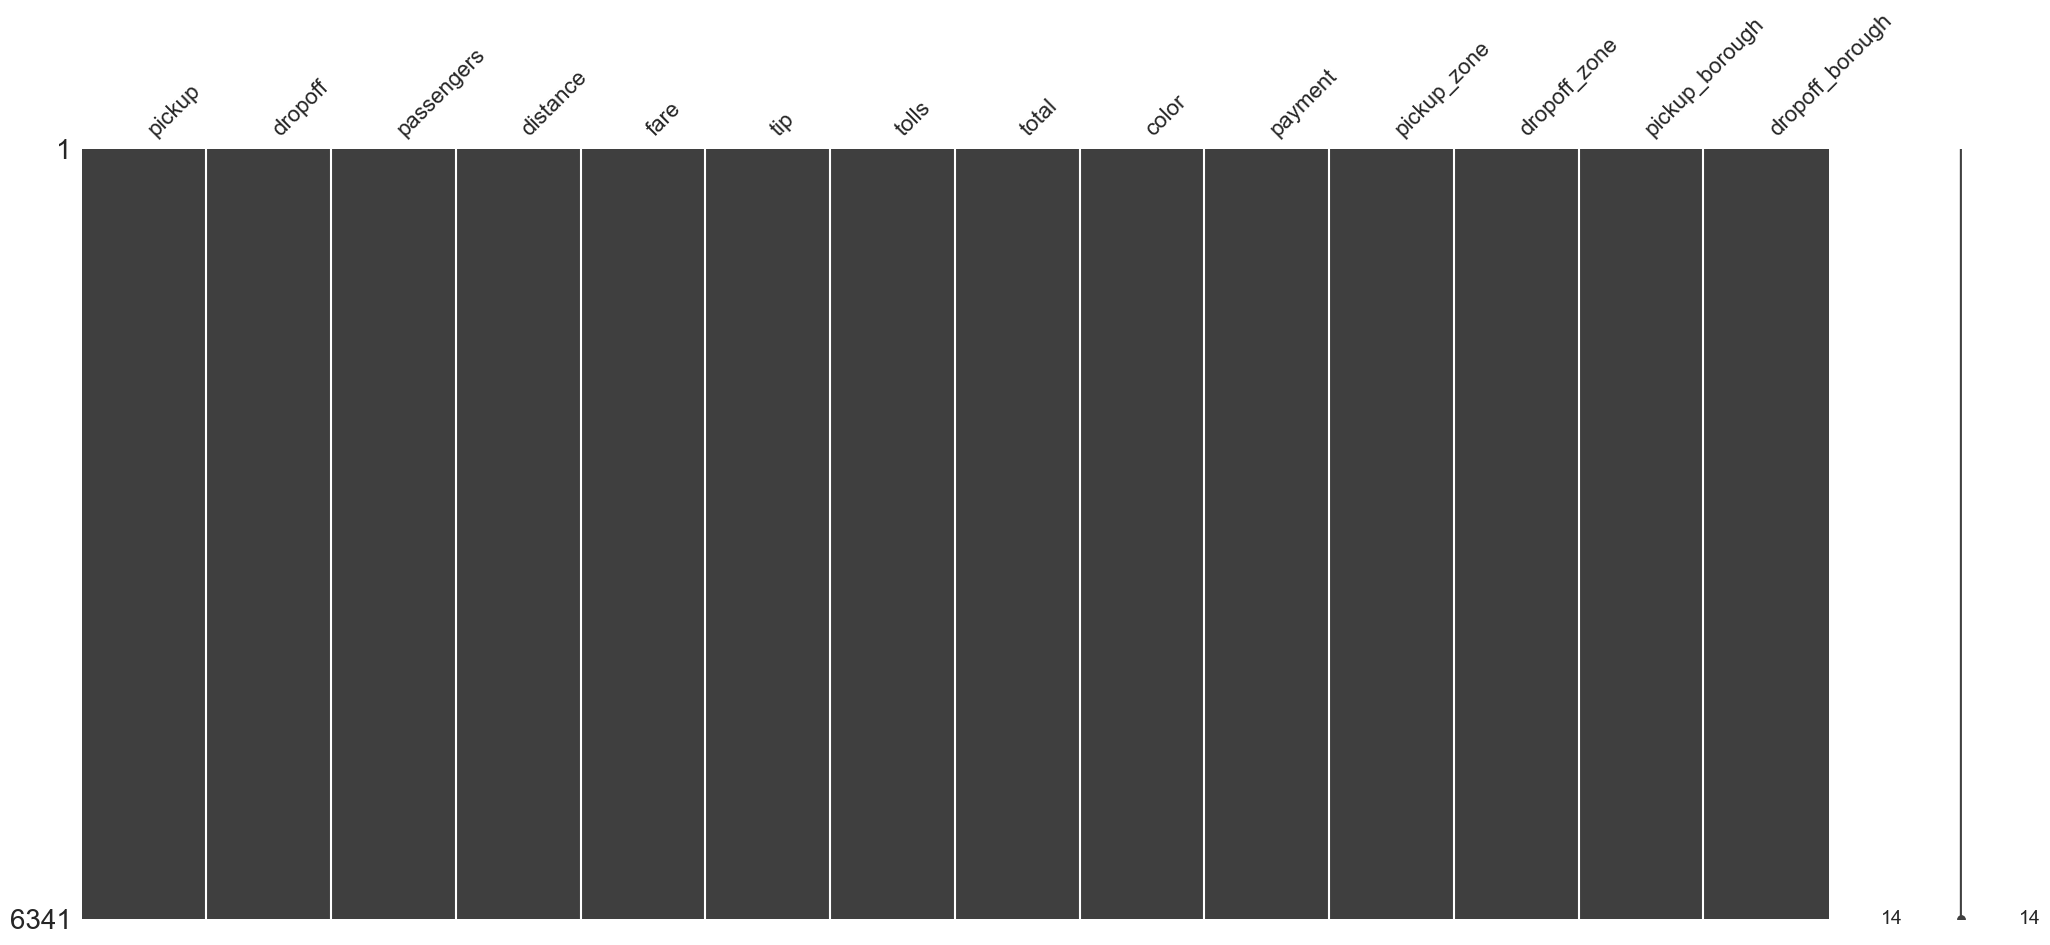

In [5]:
# Missing values after dropping them

print(taxis.isna().sum())
msno.matrix(taxis)


###  Information about the data

In [6]:
# Information about the data

print('Columns:',  'Number of columns ',len(taxis.columns), '\n', taxis.columns)
print('-----------------------------')
print('Passengers Values:\n', taxis['passengers'].unique())
print('-----------------------------')
print('Color Values:\n', taxis['color'].unique())
print('-----------------------------')
print('Payment Values:\n', taxis['payment'].unique())
print('Color Values:\n', taxis['color'].unique())



Columns: Number of columns  14 
 Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')
-----------------------------
Passengers Values:
 [1 3 0 6 5 2 4]
-----------------------------
Color Values:
 ['yellow' 'green']
-----------------------------
Payment Values:
 ['credit card' 'cash']
Color Values:
 ['yellow' 'green']


In [7]:
taxis['color'].value_counts()

color
yellow    5373
green      968
Name: count, dtype: int64

In [8]:
taxis['pickup_borough'].value_counts()

pickup_borough
Manhattan    5226
Queens        638
Brooklyn      378
Bronx          99
Name: count, dtype: int64

In [9]:
taxis['dropoff_borough'].value_counts()

dropoff_borough
Manhattan        5172
Queens            534
Brooklyn          497
Bronx             136
Staten Island       2
Name: count, dtype: int64

In [11]:
# Statistical Description 

statistics = round(taxis.describe(), 2)
statistics.drop(columns='passengers', inplace=True)
statistics

distance     fare      tip    tolls    total
count   6341.00  6341.00  6341.00  6341.00  6341.00
mean       3.00    12.89     1.97     0.31    18.31
std        3.72    10.72     2.36     1.37    12.95
min        0.00     1.00     0.00     0.00     1.30
25%        0.99     6.50     0.00     0.00    10.80
50%        1.65     9.50     1.75     0.00    14.16
75%        3.20    15.00     2.82     0.00    20.30
max       36.70   150.00    23.19    24.02   174.82

### Passengers on board 

In [12]:
passengers_count = taxis['passengers'].value_counts().reset_index()
passengers_count = passengers_count.sort_values(by='passengers').reset_index()
passengers_count.drop(columns='index', inplace=True)
passengers_count


passengers  count
0           0     90
1           1   4608
2           2    865
3           3    240
4           4    109
5           5    277
6           6    152

C:\Users\User\AppData\Local\Temp\ipykernel_14564\2457961737.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(f'{i:,.0f}' for i in ax.get_yticks())


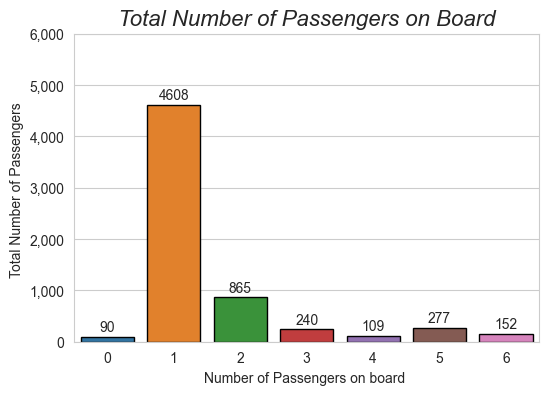

In [13]:
# Bar Plot Total Number of passengers on Board 

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(data=passengers_count,
            x='passengers',
            y='count',
            edgecolor='black',
            capsize=.2)
ax.set_ylim([0,6000])
ax.set_yticklabels(f'{i:,.0f}' for i in ax.get_yticks()) 

plt.title('Total Number of Passengers on Board', fontsize=16, style='italic')
plt.xlabel('Number of Passengers on board ')
plt.ylabel('Total Number of Passengers ')

# ax.annotate(text=passengers_count.loc[0, 'count'],
#             xy =(0,200),
#             ha='center') 

for i, count in enumerate(passengers_count['count']):
    ax.annotate(text=str(count),
                xy=(i, count+50),
                ha='center', va='bottom')

plt.show()

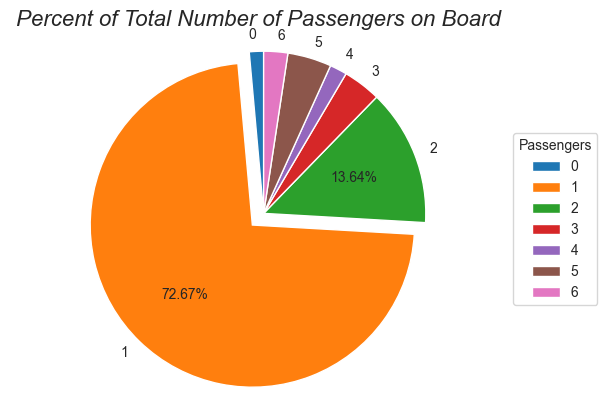

In [14]:
# Pie Chart Number of passengers on Board 
passengers_list = [0,1,2,3,4,5,6]

plt.pie(passengers_count['count'],
        labels=passengers_list,
        autopct=lambda p: '{:.2f}%'.format(p) if p > 5 else '',
        startangle=90,
        explode=[0, 0.1,0,0,0,0,0],
        )

plt.legend(title='Passengers', 
           labels=[f'{count}' for count in passengers_list],
           bbox_to_anchor=(1, 0.5), loc='center left')

plt.axis('equal')

plt.title('Percent of Total Number of Passengers on Board', fontsize=16, style='italic')
plt.show()

### Payment Method

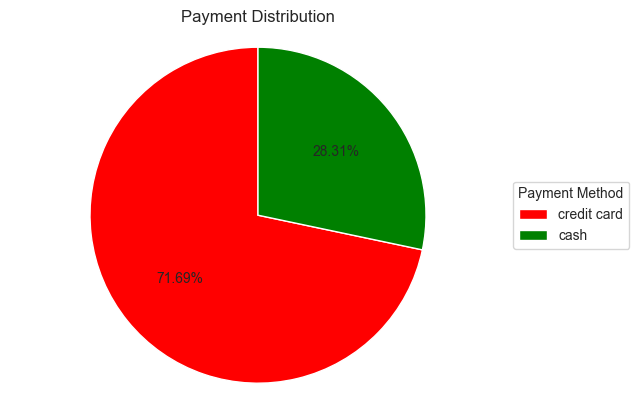

In [15]:
# Group the data by 'payment' and calculate the counts

payment_counts = taxis['payment'].value_counts()

# Create a pie chart for the payment categories
plt.pie(payment_counts, 
        #labels=payment_counts.index,
        autopct='%.2f%%',
        colors=['red', 'green'],
        startangle=90)
plt.title('Payment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.legend(title='Payment Method', 
           labels=[f'{count}' for count in payment_counts.index],
           bbox_to_anchor=(1, 0.5),
           loc='center left')

plt.show()


### Distance traveled by passenger on board

In [16]:
distance_per_passenger = taxis.groupby('passengers')['distance'].sum().reset_index()
distance_per_passenger

passengers  distance
0           0    259.30
1           1  13832.01
2           2   2541.29
3           3    732.45
4           4    322.31
5           5    821.08
6           6    500.02

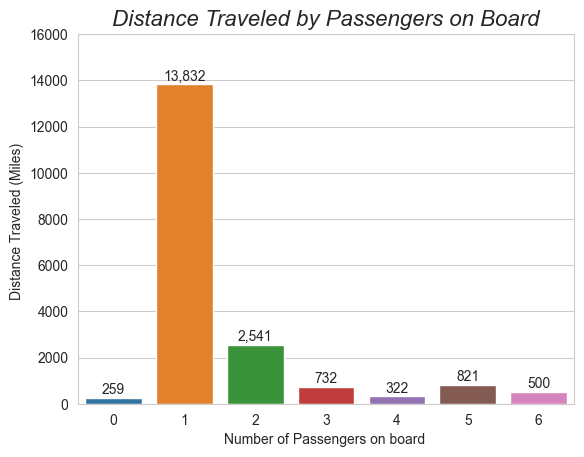

In [17]:
fig, ax = plt.subplots()

sns.barplot(data=distance_per_passenger,
            x='passengers',
            y='distance')
ax.set_ylim([0,16000])

plt.title('Distance Traveled by Passengers on Board', fontsize=16, style='italic')
plt.xlabel('Number of Passengers on board ')
plt.ylabel('Distance Traveled (Miles) ')

for i, distance in enumerate(distance_per_passenger['distance']):
    ax.annotate(text=format(distance,',.0f'),
                xy=(i, distance+50),
                ha='center', va='bottom')

# ax.annotate(text=round(distance_per_passenger.loc[0, 'distance']),
#             xy =(0,300),
#             ha='center') 

plt.show()

### Pickup - Drop off Locations

In [18]:
pickup_location = taxis['pickup_borough'].value_counts().reset_index()
pickup_location

pickup_borough  count
0      Manhattan   5226
1         Queens    638
2       Brooklyn    378
3          Bronx     99

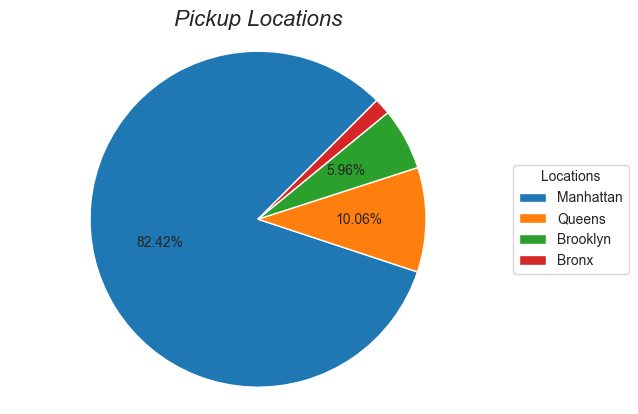

In [19]:
plt.pie(pickup_location['count'],
        #labels=pickup_location['pickup_borough'],
        autopct=lambda p: '{:.2f}%'.format(p) if p > 5 else '',
        startangle=45)

plt.legend(title='Locations', 
           labels=[f'{location}' for location in pickup_location['pickup_borough']],
           bbox_to_anchor=(1, 0.5), loc='center left')

plt.axis('equal')

plt.title('Pickup Locations', fontsize=16, style='italic')
plt.show()

In [20]:
dropoff_location = taxis['dropoff_borough'].value_counts().reset_index()
dropoff_location

dropoff_borough  count
0       Manhattan   5172
1          Queens    534
2        Brooklyn    497
3           Bronx    136
4   Staten Island      2

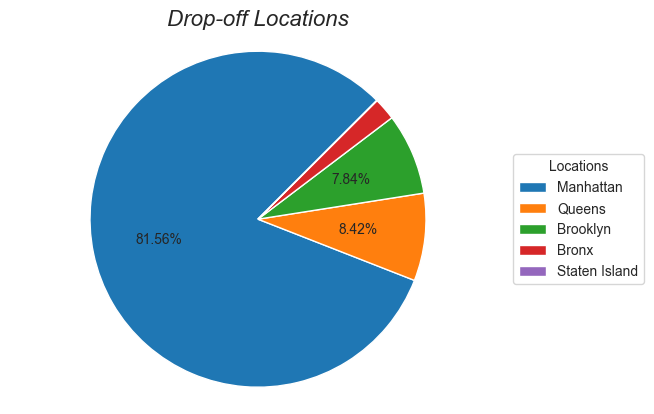

In [21]:
plt.pie(dropoff_location['count'],
        #labels=dropoff_location['pickup_borough'],
        autopct=lambda p: '{:.2f}%'.format(p) if p > 5 else '',
        startangle=45)

plt.legend(title='Locations', 
           labels=[f'{location}' for location in dropoff_location['dropoff_borough']],
           bbox_to_anchor=(1, 0.5), loc='center left')

plt.axis('equal')

plt.title('Drop-off Locations', fontsize=16, style='italic')
plt.show()

### Taxi Color

In [22]:
taxi_color = taxis['color'].value_counts().reset_index()
taxi_color

color  count
0  yellow   5373
1   green    968

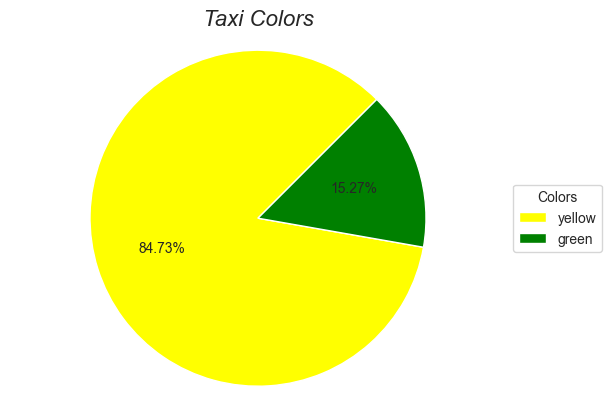

In [23]:
plt.pie(taxi_color['count'],
        #labels=taxi_color['color'],
        autopct=lambda p: '{:.2f}%'.format(p) if p > 5 else '',
        startangle=45,
        colors=['yellow', 'green'])

plt.legend(title='Colors', 
           labels=[f'{count}' for count in taxi_color['color']],
           bbox_to_anchor=(1, 0.5), loc='center left')

plt.axis('equal')

plt.title('Taxi Colors', fontsize=16, style='italic')
plt.show()

### Top 5 Pickup and Drop-off Zones

In [24]:
top_5_pickup_zone = taxis['pickup_zone'].value_counts().reset_index().head(5)
top_5_pickup_zone

pickup_zone  count
0                Midtown Center    227
1  Penn Station/Madison Sq West    209
2         Upper East Side South    208
3                  Clinton East    208
4                  Midtown East    196

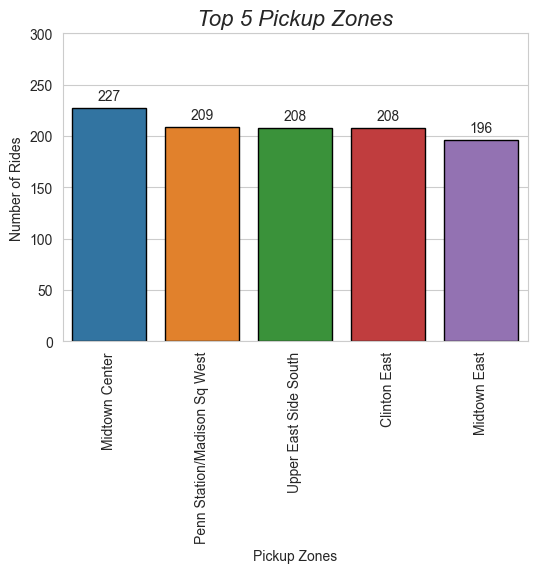

In [25]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(data=top_5_pickup_zone,
            x='pickup_zone',
            y='count',
            edgecolor='black',
            capsize=.2)
ax.set_ylim([0,300])


ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Top 5 Pickup Zones', fontsize=16, style='italic')
plt.xlabel('Pickup Zones')
plt.ylabel('Number of Rides')


for i, count in enumerate(top_5_pickup_zone['count']):
    ax.annotate(text=str(count),
                xy=(i, count+5),
                ha='center', va='bottom')

# ax.annotate(text=top_5_pickup_zone.loc[0, 'count'],
#             xy =(0,230),
#             ha='center') 

plt.show()

In [26]:
top_5_dropoff_zone = taxis['dropoff_zone'].value_counts().reset_index().head(5)
top_5_dropoff_zone

dropoff_zone  count
0  Upper East Side North    244
1            Murray Hill    217
2         Midtown Center    215
3           Midtown East    175
4  Upper East Side South    173

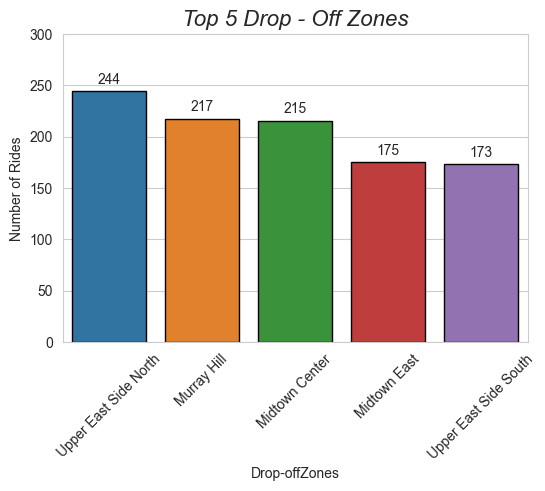

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(data=top_5_dropoff_zone,
            x='dropoff_zone',
            y='count',
            edgecolor='black',
            capsize=.2)

ax.set_ylim([0,300])


ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.title('Top 5 Drop - Off Zones', fontsize=16, style='italic')
plt.xlabel('Drop-offZones')
plt.ylabel('Number of Rides')


for i, count in enumerate(top_5_dropoff_zone['count']):
    ax.annotate(text=str(count),
                xy=(i, count+5),
                ha='center', va='bottom')

# ax.annotate(text=top_5_dropoff_zone.loc[0, 'count'],
#             xy =(0,260),
#             ha='center') 

plt.show()

### Insights by Days of Week

In [28]:
#Convert  to datetime format

taxis['pickup'] = pd.to_datetime(taxis['pickup']) 

taxis['pickup_date'] = taxis['pickup'].dt.date
taxis['pickup_day_of_week'] = taxis['pickup'].dt.day_name()
taxis['pickup_hour'] = taxis['pickup'].dt.strftime('%H:%M')


taxis['dropoff'] = pd.to_datetime(taxis['dropoff'])


taxis['dropoff_hour'] = taxis['dropoff'].dt.strftime('%H:%M')

taxis['route_duration'] = taxis['dropoff'] - taxis['pickup']


In [29]:
taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough pickup_date  \
0    UN/Turtle Bay South      Manhattan       Manhattan  2019-03-23   
1  Upper West Side South      Manhattan       Manhattan  2019-03-04   
2           West Village      Manhattan       Manhattan  2019-03-27   
3         Yorkville West      Manhattan       Manhattan  2019-03-10   
4         Yorkville West      Manhattan       Manhattan  2019-03-30   

  pickup_day_of_week pickup_hour dropoff_hour  route_duration  
0           Saturday       20:21        20:27 0 days 00:06:15  
1             Monday       16:11        16:19 0 days 00:07:05  
2          Wednesday       17:53        18:00 0 days 00:07:24  
3             Sunday       01:23        01:49 0 days 00:25:52  
4           Saturday       13:27        13:37 0 days 00:09:32

In [30]:
taxis.describe()

pickup                        dropoff  \
count                           6341                           6341   
mean   2019-03-16 08:30:26.574830080  2019-03-16 08:44:47.525784832   
min              2019-02-28 23:29:03            2019-02-28 23:32:35   
25%              2019-03-08 15:28:20            2019-03-08 15:54:00   
50%              2019-03-15 21:57:47            2019-03-15 22:07:48   
75%              2019-03-23 17:45:29            2019-03-23 17:57:56   
max              2019-03-31 23:43:45            2019-04-01 00:13:58   
std                              NaN                            NaN   

        passengers     distance         fare          tip        tolls  \
count  6341.000000  6341.000000  6341.000000  6341.000000  6341.000000   
mean      1.544078     2.997707    12.887931     1.972703     0.314793   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       1.000000     0.990000     6.500000     0.000000     0.000000   
50%       1.000000     1.650000     9.500000     1.750000     0.000000   
75%       2.000000     3.200000    15.000000     2.820000     0.000000   
max       6.000000    36.700000   150.000000    23.190000    24.020000   
std       1.207948     3.719775    10.722249     2.361897     1.369174   

             total             route_duration  
count  6341.000000                       6341  
mean     18.310263  0 days 00:14:20.950954108  
min       1.300000            0 days 00:00:03  
25%      10.800000            0 days 00:06:32  
50%      14.160000            0 days 00:10:56  
75%      20.300000            0 days 00:18:29  
max     174.820000            0 days 01:47:40  
std      12.950365  0 days 00:11:31.405022633

In [29]:
# Sort the data frame by Days

routes_per_day = taxis['pickup_day_of_week'].value_counts().reset_index()
sorted_routes_per_day = routes_per_day.sort_values(by='pickup_day_of_week', ascending=True)

custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


sorted_routes_per_day = routes_per_day.sort_values(by='pickup_day_of_week', 
                                                   key=lambda x: pd.Categorical(x, categories=custom_order, ordered=True)).reset_index()


sorted_routes_per_day.drop(columns='index', inplace=True)
sorted_routes_per_day


pickup_day_of_week  count
0             Monday    700
1            Tuesday    811
2          Wednesday    958
3           Thursday    896
4             Friday   1091
5           Saturday   1028
6             Sunday    857

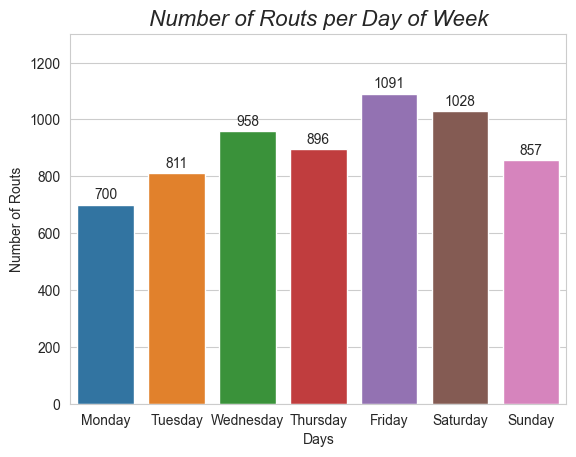

In [30]:
ax = sns.barplot(data=sorted_routes_per_day,
            x='pickup_day_of_week',
            y='count')

plt.title('Number of Routs per Day of Week', fontsize=16, style='italic')
plt.xlabel('Days')
plt.ylabel('Number of Routs')

ax.set_ylim([0,1300])

for i, count in enumerate(sorted_routes_per_day['count']):
    ax.annotate(text=str(count),
                xy=(i, count+10),
                ha='center', va='bottom')

plt.show()

In [31]:
# Average Ride Duration by Day

mean_duration_per_day = taxis.groupby('pickup_day_of_week')['route_duration'].mean().reset_index()
mean_duration_per_day

pickup_day_of_week            route_duration
0             Friday 0 days 00:14:33.450962419
1             Monday    0 days 00:13:54.030000
2           Saturday 0 days 00:13:34.329766536
3             Sunday 0 days 00:12:38.726954492
4           Thursday 0 days 00:15:33.967633928
5            Tuesday 0 days 00:14:39.646115906
6          Wednesday 0 days 00:15:23.743215031

In [32]:
# Sort the data frame by Days

mean_duration_per_day['route_duration_minutes'] = mean_duration_per_day['route_duration'].dt.total_seconds() / 60


custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


mean_duration_per_day['pickup_day_of_week'] = pd.Categorical(mean_duration_per_day['pickup_day_of_week'], categories=custom_order, ordered=True)


mean_duration_per_day['day_index'] = mean_duration_per_day['pickup_day_of_week'].cat.codes

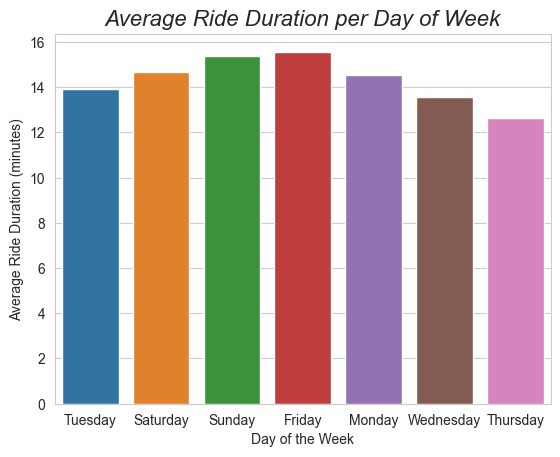

In [33]:
ax = sns.barplot(data=mean_duration_per_day,
                 x='day_index',
                 y='route_duration_minutes')  # Use the converted minutes

plt.title('Average Ride Duration per Day of Week', fontsize=16, style='italic')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Duration (minutes)')

ax.set_xticks(mean_duration_per_day['day_index'])
ax.set_xticklabels(custom_order)

plt.show()


### Frequency of Rides by Time Intervals 

In [35]:
# Convert to time format
taxis['pickup_hour'] = pd.to_datetime(taxis['pickup_hour'], format='%H:%M')

# Define the time intervals
time_intervals = [
    ('00:00', '03:00'),
    ('03:00', '06:00'),
    ('06:00', '09:00'),
    ('09:00', '12:00'),
    ('12:00', '15:00'),
    ('15:00', '18:00'),
    ('18:00', '21:00'),
    ('21:00', '23:59')  
]

# Create a function to map time to intervals
def map_time_to_interval(time):
    for start, end in time_intervals:
        start_time = pd.to_datetime(start, format='%H:%M').time()
        end_time = pd.to_datetime(end, format='%H:%M').time()
        if start_time <= time.time() <= end_time:
            return f'{start} - {end}'
    return 'Unknown'

# Apply the function to create a new column for time intervals
taxis['time_interval'] = taxis['pickup_hour'].apply(map_time_to_interval)

# Calculate the frequency of rides within each time interval
time_interval_counts = taxis['time_interval'].value_counts().sort_index()
time_interval_counts


time_interval
00:00 - 03:00     405
03:00 - 06:00     169
06:00 - 09:00     669
09:00 - 12:00     925
12:00 - 15:00    1000
15:00 - 18:00    1039
18:00 - 21:00    1181
21:00 - 23:59     953
Name: count, dtype: int64

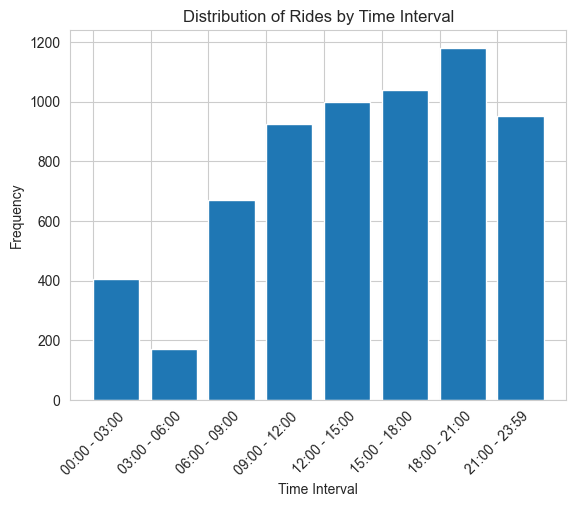

In [36]:

plt.bar(time_interval_counts.index, time_interval_counts.values, align='edge')
plt.xticks(rotation=45)
plt.xlabel('Time Interval')
plt.ylabel('Frequency')
plt.title('Distribution of Rides by Time Interval')
#plt.tight_layout()

plt.show()

### Statistical Analysis Total Payment vs Tips

In [37]:
# Ratio Tip per Total Payment Amount 

taxis['tip_ratio (%)'] = round((taxis['tip'] / taxis['total'])*100, 2)
taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment  ...           dropoff_zone  \
0    0.0  12.95  yellow  credit card  ...    UN/Turtle Bay South   
1    0.0   9.30  yellow         cash  ...  Upper West Side South   
2    0.0  14.16  yellow  credit card  ...           West Village   
3    0.0  36.95  yellow  credit card  ...         Yorkville West   
4    0.0  13.40  yellow  credit card  ...         Yorkville West   

  pickup_borough dropoff_borough pickup_date pickup_day_of_week  \
0      Manhattan       Manhattan  2019-03-23           Saturday   
1      Manhattan       Manhattan  2019-03-04             Monday   
2      Manhattan       Manhattan  2019-03-27          Wednesday   
3      Manhattan       Manhattan  2019-03-10             Sunday   
4      Manhattan       Manhattan  2019-03-30           Saturday   

          pickup_hour dropoff_hour  route_duration  time_interval  \
0 1900-01-01 20:21:00        20:27 0 days 00:06:15  18:00 - 21:00   
1 1900-01-01 16:11:00        16:19 0 days 00:07:05  15:00 - 18:00   
2 1900-01-01 17:53:00        18:00 0 days 00:07:24  15:00 - 18:00   
3 1900-01-01 01:23:00        01:49 0 days 00:25:52  00:00 - 03:00   
4 1900-01-01 13:27:00        13:37 0 days 00:09:32  12:00 - 15:00   

  tip_ratio (%)  
0         16.60  
1          0.00  
2         16.67  
3         16.64  
4          8.21  

[5 rows x 21 columns]

In [38]:
# total - tip average

print('The average of total payment is: ', round(taxis['total'].mean(), 2), '$')
print('The average tips is:             ', round(taxis['tip'].mean(), 2), '$')
print('The average percent of tips  to the total payment is:', round(taxis['tip_ratio (%)'].mean(), 2), '%')

The average of total payment is:  18.31 $
The average tips is:              1.97 $
The average percent of tips  to the total payment is: 10.11 %


C:\Users\User\PycharmProjects\Developer\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


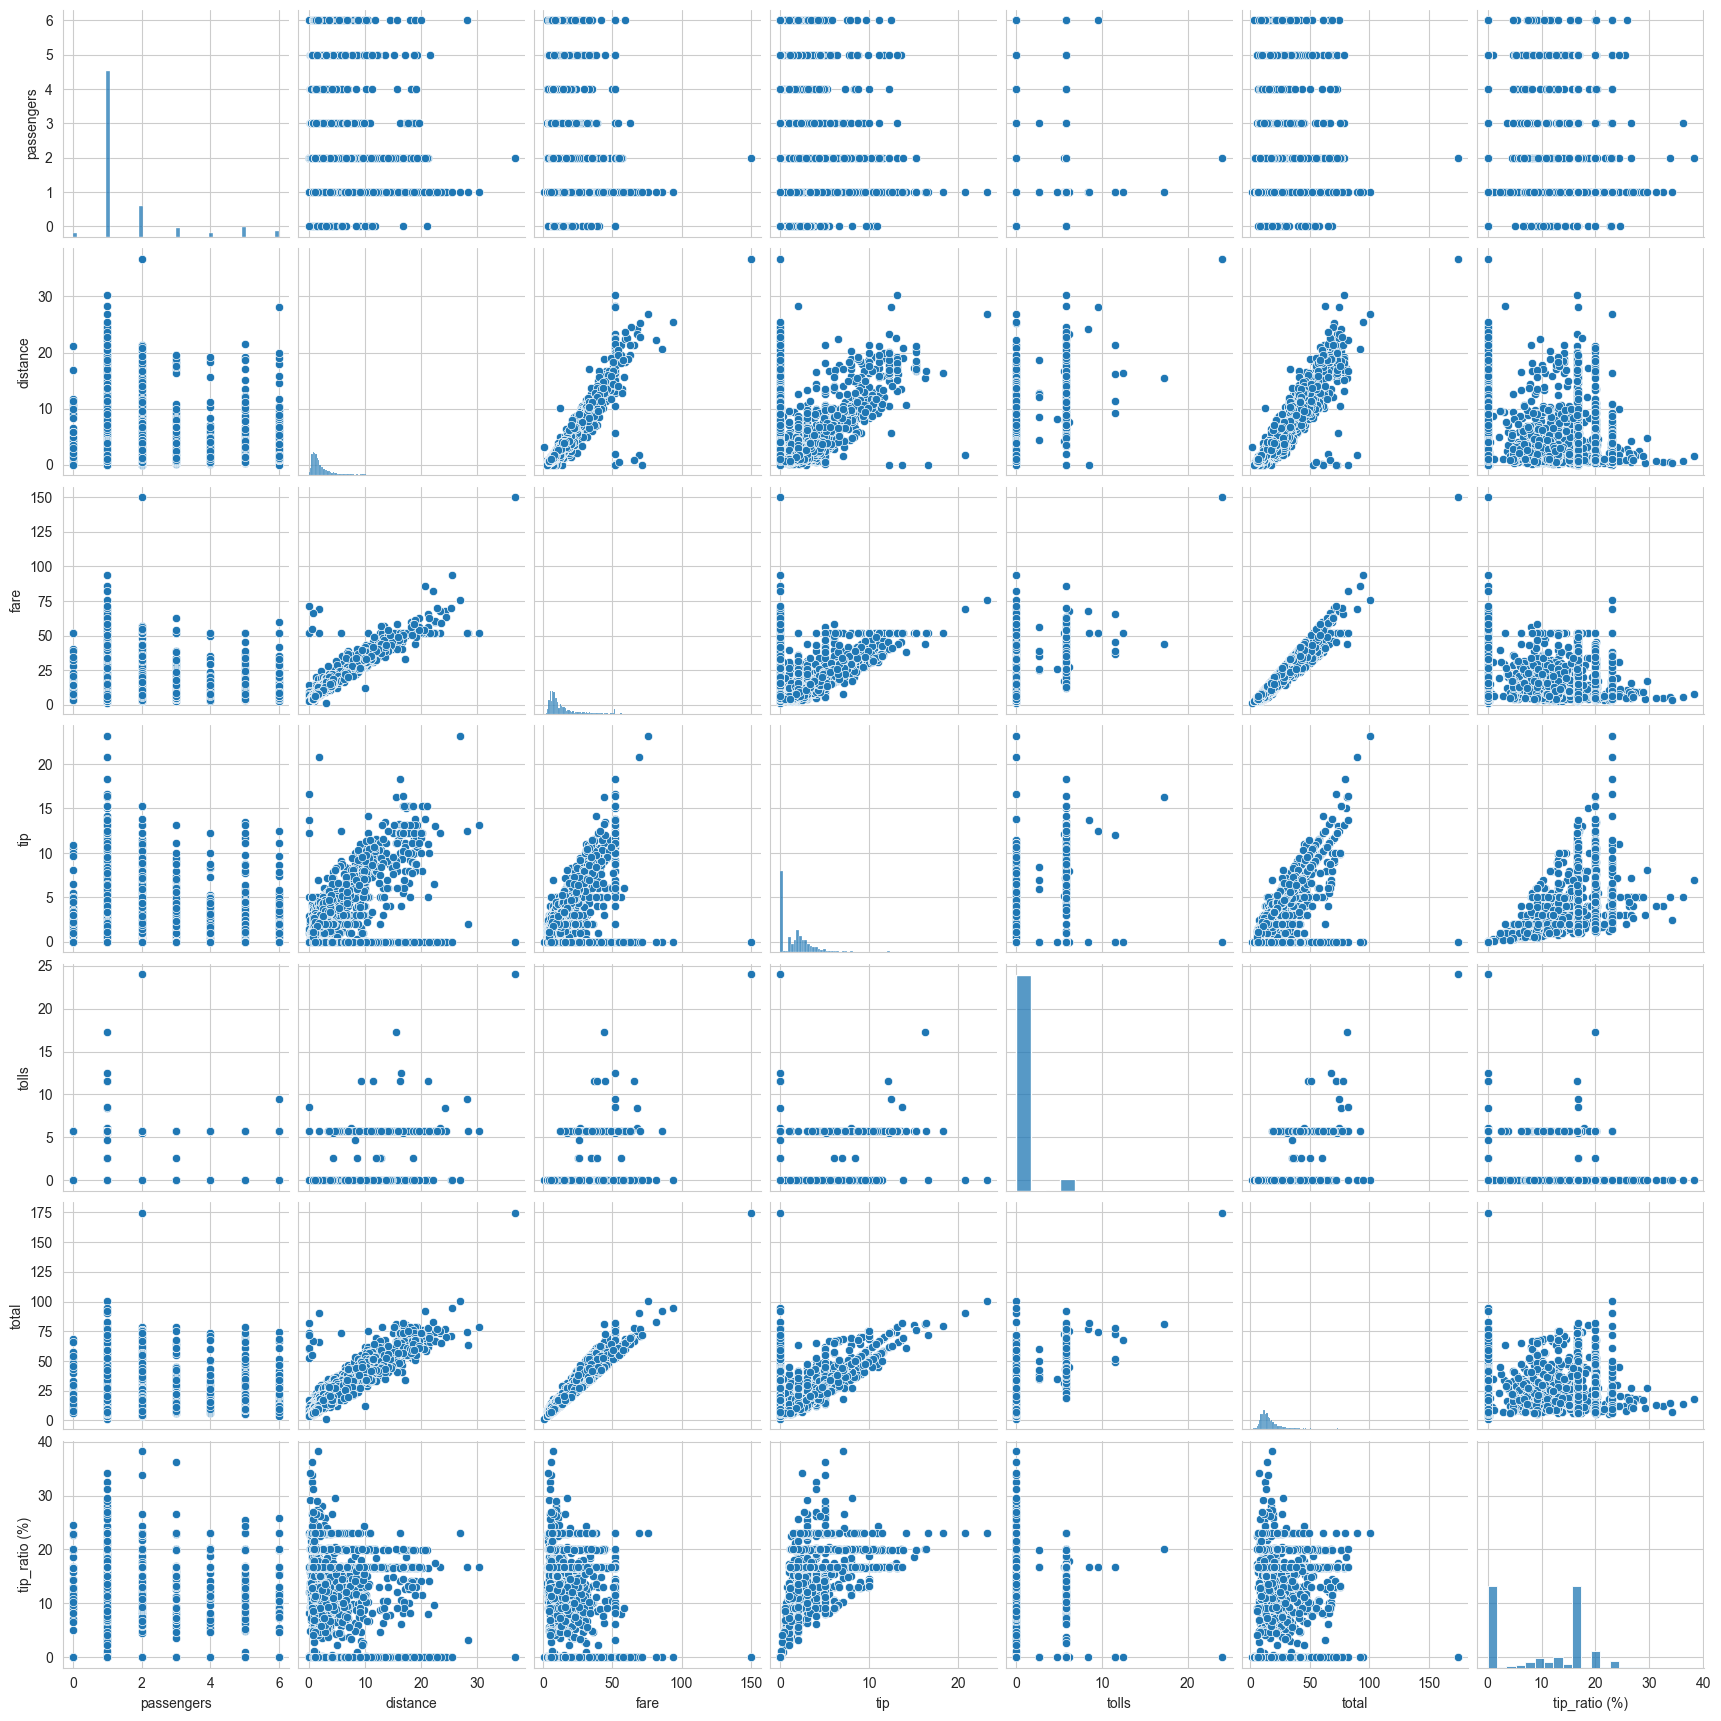

In [39]:
ax = sns.pairplot(taxis)
plt.show()

<Axes: >

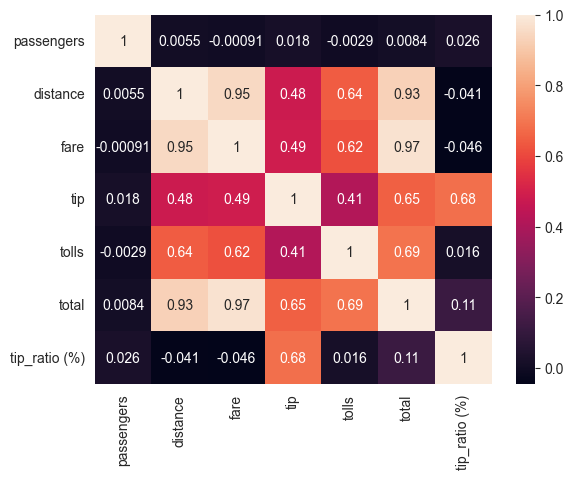

In [40]:
# Correlation Heatmap

corr = taxis.corr(method='pearson', numeric_only=True)

sns.heatmap(corr, annot=True)

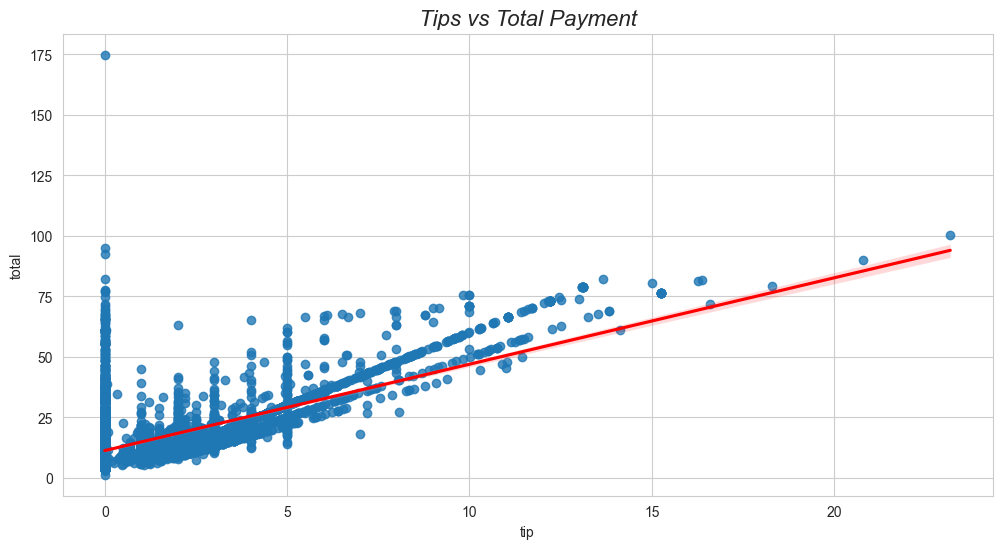

In [41]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.regplot(data=taxis,
                 x='tip',
                 y='total',
                 line_kws={'color': 'red'})

plt.title('Tips vs Total Payment', fontsize=16, style='italic')

plt.show()

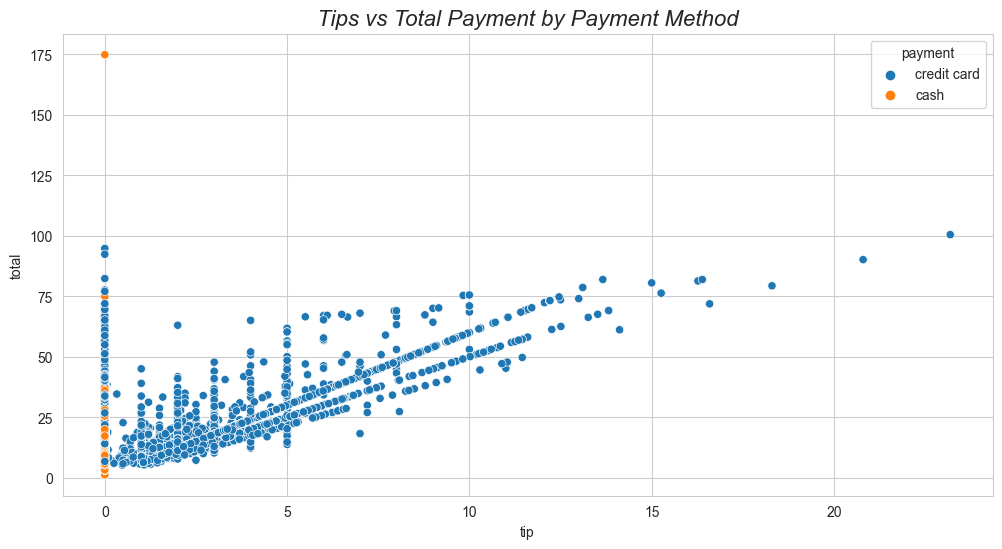

In [42]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.scatterplot(data=taxis,
                     x='tip',
                     y='total',
                     hue='payment')
plt.title('Tips vs Total Payment by Payment Method', fontsize=16, style='italic')
plt.show()

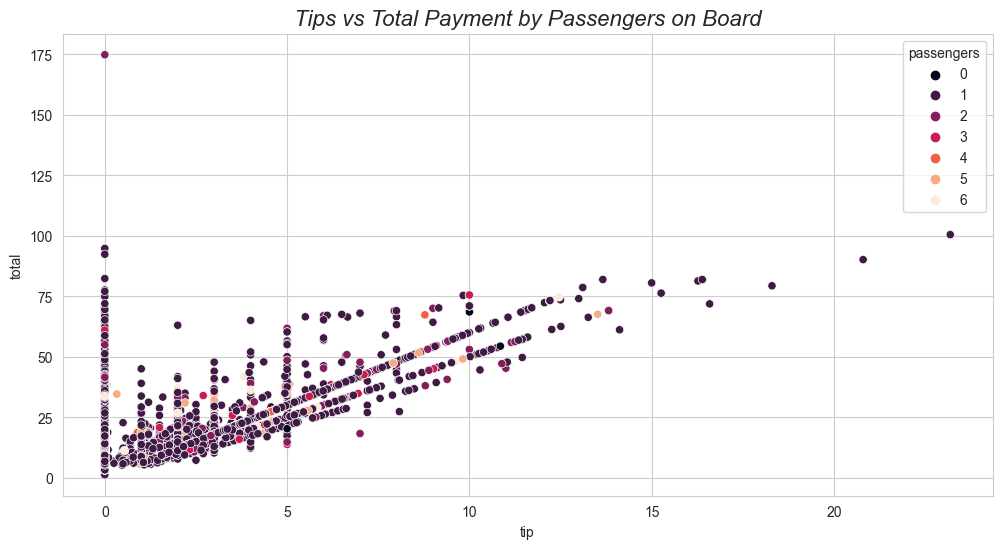

In [43]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(data=taxis,
                     x='tip',
                     y='total',
                     hue='passengers',
                     palette='rocket')
plt.title('Tips vs Total Payment by Passengers on Board', fontsize=16, style='italic')
plt.show()

In [44]:
fig = px.scatter(data_frame=taxis,
                 y='tip',
                 x='total', 
                 trendline='ols',
                 trendline_color_override='red',
                 title='Tips vs Total Payment'
                 )

fig.show()

In [45]:
# Correlation 

model = smf.ols('tip ~ total', data=taxis)
model = model.fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     4654.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:37:20   Log-Likelihood:                -12701.
No. Observations:                6341   AIC:                         2.541e+04
Df Residuals:                    6339   BIC:                         2.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2002      0.039     -5.132      0.0

In [46]:
slope = model.params['total']
intercept = model.params['Intercept']

# Print the regression line equation
print(f"Regression Line Equation: Y = {slope:.2f} * X {intercept:.2f}")

Regression Line Equation: Y = 0.12 * X -0.20


### Search whether the tip is awarded by location

In [47]:
taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment  ...           dropoff_zone  \
0    0.0  12.95  yellow  credit card  ...    UN/Turtle Bay South   
1    0.0   9.30  yellow         cash  ...  Upper West Side South   
2    0.0  14.16  yellow  credit card  ...           West Village   
3    0.0  36.95  yellow  credit card  ...         Yorkville West   
4    0.0  13.40  yellow  credit card  ...         Yorkville West   

  pickup_borough dropoff_borough pickup_date pickup_day_of_week  \
0      Manhattan       Manhattan  2019-03-23           Saturday   
1      Manhattan       Manhattan  2019-03-04             Monday   
2      Manhattan       Manhattan  2019-03-27          Wednesday   
3      Manhattan       Manhattan  2019-03-10             Sunday   
4      Manhattan       Manhattan  2019-03-30           Saturday   

          pickup_hour dropoff_hour  route_duration  time_interval  \
0 1900-01-01 20:21:00        20:27 0 days 00:06:15  18:00 - 21:00   
1 1900-01-01 16:11:00        16:19 0 days 00:07:05  15:00 - 18:00   
2 1900-01-01 17:53:00        18:00 0 days 00:07:24  15:00 - 18:00   
3 1900-01-01 01:23:00        01:49 0 days 00:25:52  00:00 - 03:00   
4 1900-01-01 13:27:00        13:37 0 days 00:09:32  12:00 - 15:00   

  tip_ratio (%)  
0         16.60  
1          0.00  
2         16.67  
3         16.64  
4          8.21  

[5 rows x 21 columns]

In [48]:
tip_by_pickup = taxis.groupby('pickup_borough')['tip'].mean().reset_index()
tip_by_pickup

pickup_borough       tip
0          Bronx  0.148586
1       Brooklyn  0.979127
2      Manhattan  1.945597
3         Queens  3.066458

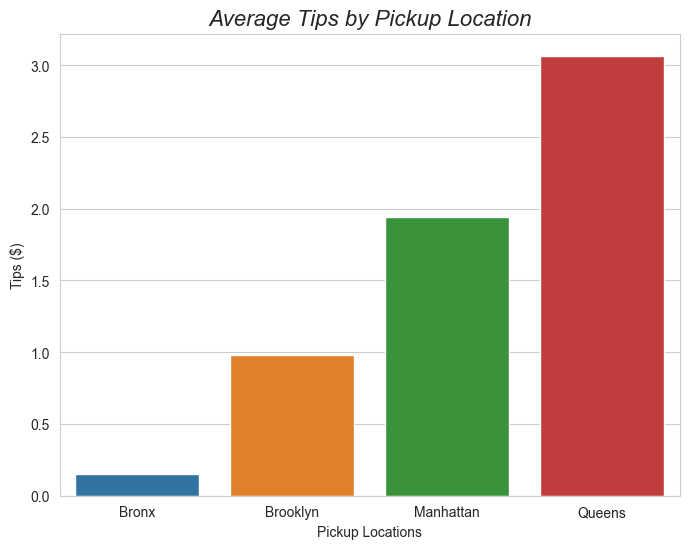

In [49]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.barplot(tip_by_pickup,
                 x='pickup_borough',
                 y='tip')

plt.title('Average Tips by Pickup Location', fontsize=16, style='italic')
plt.xlabel('Pickup Locations')
plt.ylabel('Tips ($)')

plt.show()

In [50]:
# ANOVA test for tip amounts between pickup locations

boroughs = taxis['pickup_borough'].unique()
data_by_borough = [taxis[taxis['pickup_borough'] == borough]['tip'] for borough in boroughs]

f_statistic, p_value = f_oneway(*data_by_borough)


print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in tip amounts between pickup locations.\nTherefore the tips are awarded by pickup location")
else:
    print("There is no significant difference in tip amounts between pickup locations.\nTherefore the tips are NOT awarded by pickup location")


ANOVA Results:
F-statistic: 91.57933831850553
p-value: 5.155109332424193e-58
There is a significant difference in tip amounts between pickup locations.
Therefore the tips are awarded by pickup location


In [51]:
tip_by_pickup = taxis.groupby('dropoff_borough')['tip'].mean().reset_index()
tip_by_pickup = tip_by_pickup.drop(4)
tip_by_pickup

dropoff_borough       tip
0           Bronx  0.534706
1        Brooklyn  1.921590
2       Manhattan  1.964321
3          Queens  2.422022

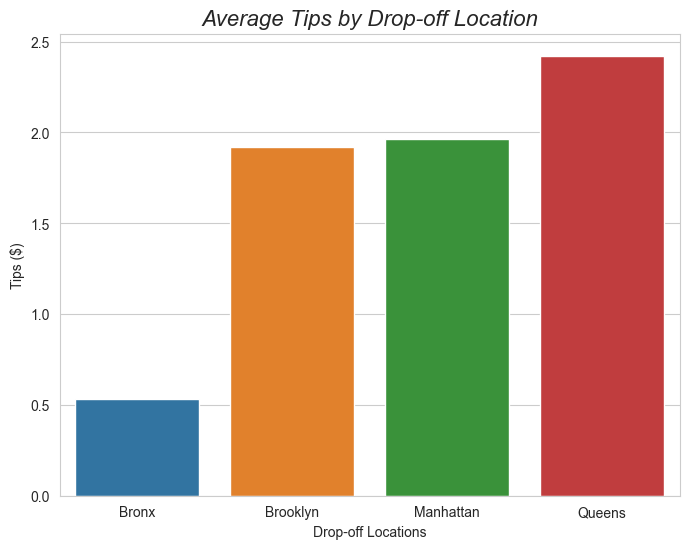

In [52]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.barplot(tip_by_pickup,
                 x='dropoff_borough',
                 y='tip')

plt.title('Average Tips by Drop-off Location', fontsize=16, style='italic')
plt.xlabel('Drop-off Locations')
plt.ylabel('Tips ($)')

plt.show()

In [53]:
# Perform ANOVA test tip amounts between drop-off boroughs

boroughs = taxis['dropoff_borough'].unique()
data_by_borough = [taxis[taxis['dropoff_borough'] == borough]['tip'] for borough in boroughs]

f_statistic, p_value = f_oneway(*data_by_borough)


print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in tip amounts between drop-off locations.\nTherefore the tips are awarded by drop-off location")
else:
    print("There is no significant difference in tip amounts between drop-off locations.\nTherefore the tips are NOT awarded by drop-off location")


ANOVA Results:
F-statistic: 31.424177966968262
p-value: 5.87859571331583e-26
There is a significant difference in tip amounts between drop-off locations.
Therefore the tips are awarded by drop-off location


In [54]:
taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment  ...           dropoff_zone  \
0    0.0  12.95  yellow  credit card  ...    UN/Turtle Bay South   
1    0.0   9.30  yellow         cash  ...  Upper West Side South   
2    0.0  14.16  yellow  credit card  ...           West Village   
3    0.0  36.95  yellow  credit card  ...         Yorkville West   
4    0.0  13.40  yellow  credit card  ...         Yorkville West   

  pickup_borough dropoff_borough pickup_date pickup_day_of_week  \
0      Manhattan       Manhattan  2019-03-23           Saturday   
1      Manhattan       Manhattan  2019-03-04             Monday   
2      Manhattan       Manhattan  2019-03-27          Wednesday   
3      Manhattan       Manhattan  2019-03-10             Sunday   
4      Manhattan       Manhattan  2019-03-30           Saturday   

          pickup_hour dropoff_hour  route_duration  time_interval  \
0 1900-01-01 20:21:00        20:27 0 days 00:06:15  18:00 - 21:00   
1 1900-01-01 16:11:00        16:19 0 days 00:07:05  15:00 - 18:00   
2 1900-01-01 17:53:00        18:00 0 days 00:07:24  15:00 - 18:00   
3 1900-01-01 01:23:00        01:49 0 days 00:25:52  00:00 - 03:00   
4 1900-01-01 13:27:00        13:37 0 days 00:09:32  12:00 - 15:00   

  tip_ratio (%)  
0         16.60  
1          0.00  
2         16.67  
3         16.64  
4          8.21  

[5 rows x 21 columns]

In [55]:
tip_by_time = taxis.groupby('time_interval')['tip'].mean()
tip_by_time

time_interval
00:00 - 03:00    2.067531
03:00 - 06:00    2.210592
06:00 - 09:00    1.767922
09:00 - 12:00    1.811135
12:00 - 15:00    1.873180
15:00 - 18:00    2.032166
18:00 - 21:00    2.038950
21:00 - 23:59    2.148300
Name: tip, dtype: float64

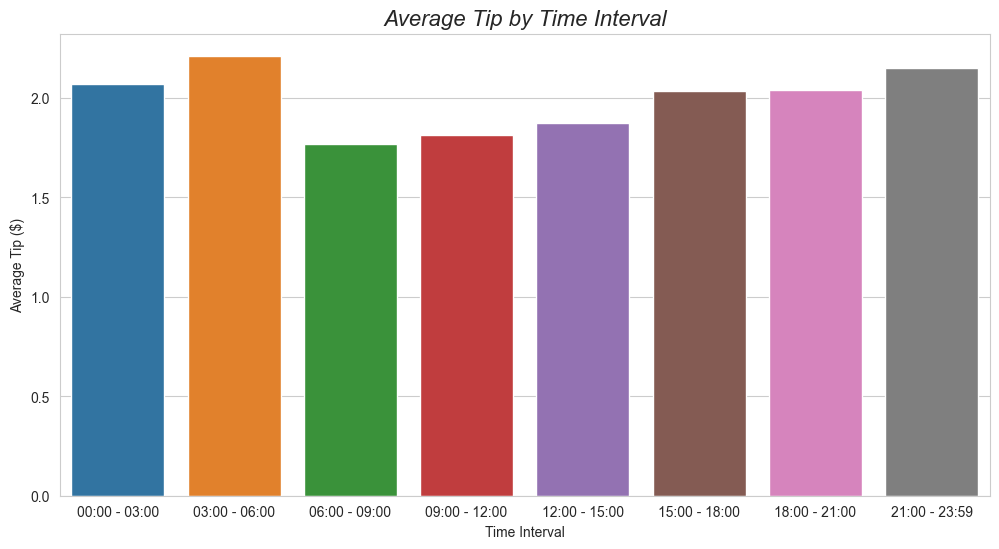

In [56]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=tip_by_time.index, y=tip_by_time.values)

plt.title('Average Tip by Time Interval', fontsize=16, style='italic')
plt.xlabel('Time Interval')
plt.ylabel('Average Tip ($)')
#plt.xticks(rotation=45)

plt.show()

In [57]:
# Perform ANOVA test tip amounts between drop-off boroughs

interval = taxis['time_interval'].unique()
data_by_time = [taxis[taxis['time_interval'] == time]['tip'] for time in interval]

f_statistic, p_value = f_oneway(*data_by_borough)


print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in tip amounts between time intervals.\nTherefore the tips are awarded by the time of the drive")
else:
    print("There is no significant difference in tip amounts between drop-off locations.\nTherefore the tips are NOT awarded by the time of the drive")


ANOVA Results:
F-statistic: 31.424177966968262
p-value: 5.87859571331583e-26
There is a significant difference in tip amounts between time intervals.
Therefore the tips are awarded by the time of the drive


In [58]:
taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment  ...           dropoff_zone  \
0    0.0  12.95  yellow  credit card  ...    UN/Turtle Bay South   
1    0.0   9.30  yellow         cash  ...  Upper West Side South   
2    0.0  14.16  yellow  credit card  ...           West Village   
3    0.0  36.95  yellow  credit card  ...         Yorkville West   
4    0.0  13.40  yellow  credit card  ...         Yorkville West   

  pickup_borough dropoff_borough pickup_date pickup_day_of_week  \
0      Manhattan       Manhattan  2019-03-23           Saturday   
1      Manhattan       Manhattan  2019-03-04             Monday   
2      Manhattan       Manhattan  2019-03-27          Wednesday   
3      Manhattan       Manhattan  2019-03-10             Sunday   
4      Manhattan       Manhattan  2019-03-30           Saturday   

          pickup_hour dropoff_hour  route_duration  time_interval  \
0 1900-01-01 20:21:00        20:27 0 days 00:06:15  18:00 - 21:00   
1 1900-01-01 16:11:00        16:19 0 days 00:07:05  15:00 - 18:00   
2 1900-01-01 17:53:00        18:00 0 days 00:07:24  15:00 - 18:00   
3 1900-01-01 01:23:00        01:49 0 days 00:25:52  00:00 - 03:00   
4 1900-01-01 13:27:00        13:37 0 days 00:09:32  12:00 - 15:00   

  tip_ratio (%)  
0         16.60  
1          0.00  
2         16.67  
3         16.64  
4          8.21  

[5 rows x 21 columns]

In [59]:
tip_by_dropoff_total = taxis.groupby(['dropoff_borough', 'total'])['tip'].mean()
tip_by_dropoff_total

dropoff_borough  total 
Bronx            3.30       0.00
                 3.80       0.00
                 4.30       0.00
                 5.30       0.00
                 5.80       0.00
                           ...  
Queens           90.16     20.80
                 94.80      0.00
                 174.82     0.00
Staten Island    72.38     12.06
                 81.35     16.27
Name: tip, Length: 1287, dtype: float64

In [60]:
tip_by_dropoff_total = pd.melt(taxis, id_vars=['dropoff_borough', 'total'], value_vars=['tip'], var_name='variable', value_name='tip_value')
tip_by_dropoff_total

dropoff_borough  total variable  tip_value
0          Manhattan  12.95      tip       2.15
1          Manhattan   9.30      tip       0.00
2          Manhattan  14.16      tip       2.36
3          Manhattan  36.95      tip       6.15
4          Manhattan  13.40      tip       1.10
...              ...    ...      ...        ...
6336       Manhattan   6.36      tip       1.06
6337           Bronx  58.80      tip       0.00
6338        Brooklyn  17.30      tip       0.00
6339        Brooklyn   6.80      tip       0.00
6340        Brooklyn  20.16      tip       3.36

[6341 rows x 4 columns]

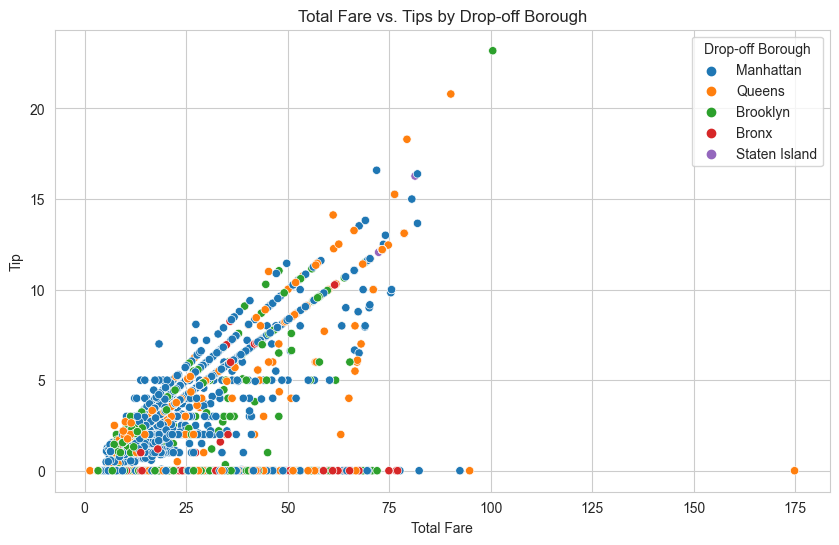

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=taxis, x='total', y='tip', hue='dropoff_borough')
plt.title('Total Fare vs. Tips by Drop-off Borough')
plt.xlabel('Total Fare')
plt.ylabel('Tip')
plt.legend(title='Drop-off Borough')
plt.show()

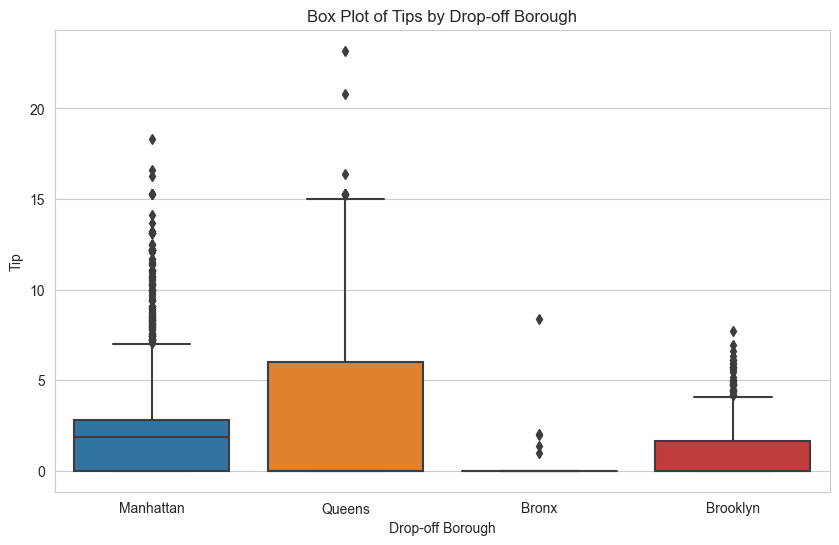

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=taxis, x='pickup_borough', y='tip')
plt.title('Box Plot of Tips by Drop-off Borough')
plt.xlabel('Drop-off Borough')
plt.ylabel('Tip')
plt.show()

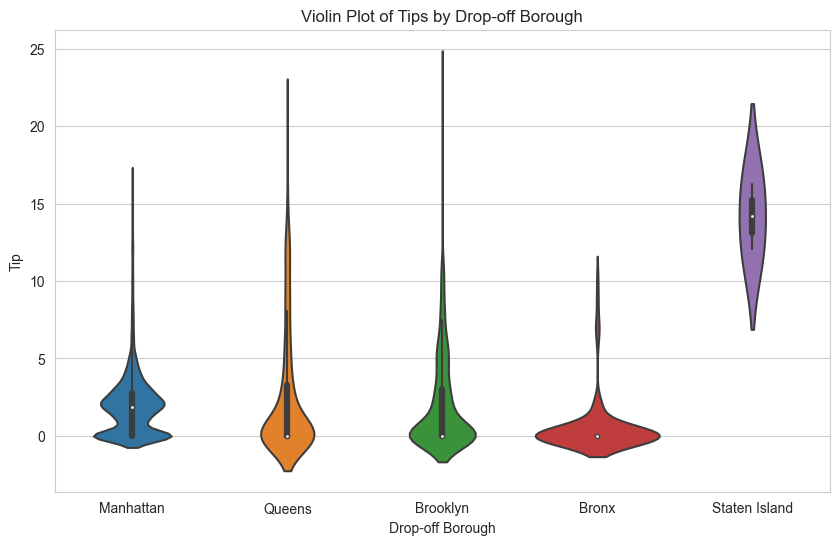

In [63]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=taxis, x='dropoff_borough', y='tip')
plt.title('Violin Plot of Tips by Drop-off Borough')
plt.xlabel('Drop-off Borough')
plt.ylabel('Tip')
plt.show()